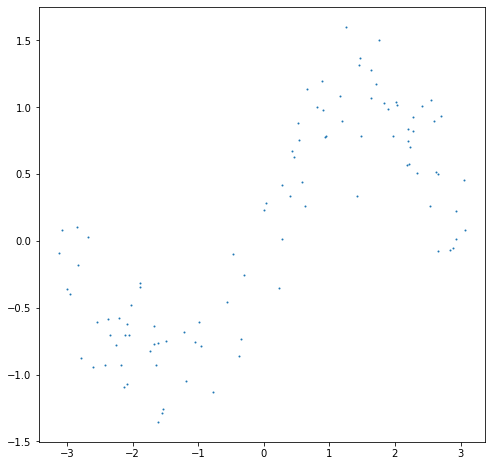

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import math

def salt(N, stddev):
    return np.random.randn(N) * stddev

b0 = math.pi
b1 = math.e    

N = 100
sigma = 0.3
X = 2 * np.pi * np.random.rand(N) - np.pi
Y = np.sin(X) + salt(N, sigma)


plt.figure(figsize=(8, 8))
plt.scatter(X, Y, s=1)
plt.show()



In [82]:
def basis_function(X, degree): #Polynomial
    kernelized = [np.power(X, d) for d in range(degree + 1)]
    return np.concatenate(kernelized, axis=1)


def pseudo_inverse(A):
    return np.linalg.inv(A.transpose() @ A) @ A.transpose()


class BayesianLinearRegression:    
    def __init__(self, degree):
        self.degree = degree
        
        self.w_mean = np.zeros(shape=(degree + 1, 1), dtype=np.float)
        self.w_sigma_inverse = np.eye(degree + 1, dtype=np.float)
        
        self.eps_alpha = 1.0
        self.eps_beta = 1.0
    
    def update(self, X, Y):
        eps_var = self.eps_beta / (self.eps_alpha + 1.0)
        Pi = basis_function(X.reshape(-1, 1), self.degree)
        new_w_sigma_inverse = (1./(eps_var)) * Pi.transpose() @ Pi + self.w_sigma_inverse        
        new_w_mean = np.linalg.inv(new_w_sigma_inverse) @ ((1./(eps_var)) * Pi.transpose() @ Y.reshape(-1, 1) + self.w_sigma_inverse @ self.w_mean)
        self.w_mean = new_w_mean
        self.w_sigma_inverse = new_w_sigma_inverse
        self.eps_alpha += 0.5 * len(X)
        Y_hat = (Pi @ self.w_mean).reshape(-1)
        self.eps_beta += 0.5 * ((Y - Y_hat) * (Y - Y_hat)).sum()

    def __call__(self, X):
        Pi = basis_function(X.reshape(-1, 1), self.degree)
        Y = Pi @ self.w_mean
        return Y.reshape(-1)
    
    def w_sample_predict(self, X):
        Pi = basis_function(X.reshape(-1, 1), self.degree)
        w_sample = np.linalg.cholesky(np.linalg.inv(self.w_sigma_inverse)) @ np.random.randn(self.degree + 1, 1) + self.w_mean
        Y = Pi @ w_sample
        return Y.reshape(-1)
        
        
M = 5
model = BayesianLinearRegression(degree=M)
print(model.w_mean)
print(model.w_sigma_inverse)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


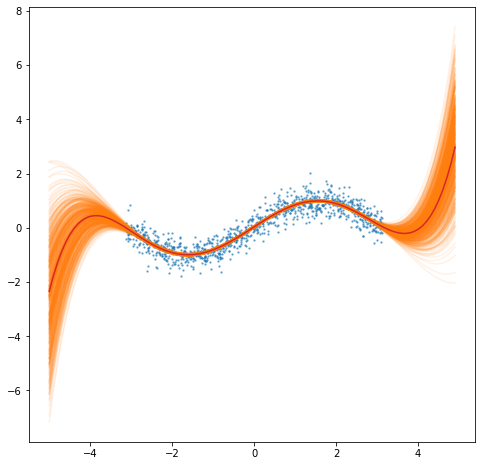

In [83]:
plt.figure(figsize=(8, 8))
for iter in range(100):
    X = 2 * np.pi * np.random.rand(10) - np.pi
    Y = np.sin(X) + salt(10, sigma)
    model.update(X, Y)
    plt.scatter(X, Y, s=2, c='tab:blue', alpha=0.5)
    
dom = np.arange(-5. , 5., 0.1)
for k in range(500):
    plt.plot(dom, model.w_sample_predict(dom), c='tab:orange', alpha=0.1)
plt.plot(dom, model(dom), c='tab:red')
plt.show()

In [84]:
print(model.w_mean)
print('epsilon stddev:',np.sqrt(model.eps_beta / (model.eps_alpha + 1.0)))

[[ 0.03383598]
 [ 0.97630456]
 [-0.01891485]
 [-0.1532423 ]
 [ 0.00176334]
 [ 0.00553088]]
epsilon stddev: 0.3036942022324808
